In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
import glob

In [2]:
Phil = pd.read_csv('cleaned_Phil.csv', low_memory=False)
Weather = pd.read_csv('Philadelphia', low_memory=False)
Weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Philadelphia,2015-01-01 05:54:00,-2.0,33.0,Fair,1022.88,24.0,0.0,-8.0
1,Philadelphia,2015-01-01 06:54:00,-2.0,33.0,Fair,1022.20,24.0,0.0,-8.0
2,Philadelphia,2015-01-01 07:54:00,-2.0,33.0,Fair,1022.20,19.0,0.0,-7.0
3,Philadelphia,2015-01-01 08:54:00,-1.0,33.0,Fair,1021.87,22.0,0.0,-7.0
4,Philadelphia,2015-01-01 09:54:00,-1.0,33.0,Fair,1021.87,26.0,0.0,-8.0
...,...,...,...,...,...,...,...,...,...
90876,Philadelphia,2023-01-01 04:00:00,11.0,26.0,Cloudy,1007.55,9.0,0.0,11.0
90877,Philadelphia,2023-01-01 04:30:00,11.0,26.0,Cloudy,1009.24,15.0,0.0,11.0
90878,Philadelphia,2023-01-01 04:37:00,11.0,20.0,Fog,1008.90,20.0,0.0,11.0
90879,Philadelphia,2023-01-01 04:48:00,11.0,20.0,Fog,1008.57,11.0,0.0,11.0


In [3]:
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90881 entries, 0 to 90880
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     90881 non-null  object 
 1   timestamp                90881 non-null  object 
 2   temperature              90872 non-null  float64
 3   cloud_cover              90878 non-null  float64
 4   cloud_cover_description  90878 non-null  object 
 5   pressure                 90867 non-null  float64
 6   windspeed                90829 non-null  float64
 7   precipitation            90881 non-null  float64
 8   felt_temperature         90861 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.2+ MB


In [4]:
Weather['timestamp'] = pd.to_datetime(Weather['timestamp'])

start_date = pd.to_datetime('2020-12-31 23:54:00')
end_date = pd.to_datetime('2023-01-01 00:54:00')
m = (Weather['timestamp'] >= start_date) & (Weather['timestamp'] <= end_date) & (Weather['timestamp'].dt.minute == 54)
Weather.drop(Weather.loc[~m].index, inplace=True)
Weather

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
69161,Philadelphia,2020-12-31 23:54:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
69162,Philadelphia,2021-01-01 00:54:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0
69163,Philadelphia,2021-01-01 01:54:00,4.0,26.0,Cloudy,1028.20,19.0,0.00,0.0
69164,Philadelphia,2021-01-01 02:54:00,3.0,29.0,Partly Cloudy,1028.88,20.0,0.00,-2.0
69165,Philadelphia,2021-01-01 03:54:00,2.0,27.0,Mostly Cloudy,1029.90,17.0,0.00,-2.0
...,...,...,...,...,...,...,...,...,...
90852,Philadelphia,2022-12-31 20:54:00,12.0,20.0,Fog,1011.95,0.0,0.00,12.0
90856,Philadelphia,2022-12-31 21:54:00,11.0,20.0,Fog,1011.61,0.0,0.00,11.0
90859,Philadelphia,2022-12-31 22:54:00,12.0,11.0,Light Rain,1010.94,6.0,0.25,12.0
90863,Philadelphia,2022-12-31 23:54:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0


In [5]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
80747,Philadelphia,2022-01-28 04:54:00,-1.0,26.0,Cloudy,1023.80,NaN,0.00,NaN
80814,Philadelphia,2022-01-29 15:54:00,-7.0,14.0,Light Snow,1008.57,NaN,0.00,NaN
80837,Philadelphia,2022-01-30 09:54:00,NaN,33.0,Fair,1016.01,15.0,0.00,NaN
80873,Philadelphia,2022-01-31 20:54:00,2.0,30.0,Partly Cloudy,1026.85,NaN,0.00,NaN
81649,Philadelphia,2022-02-25 14:54:00,3.0,11.0,Light Rain,1016.35,NaN,2.54,NaN
83028,Philadelphia,2022-04-10 21:54:00,NaN,28.0,Mostly Cloudy,1011.95,NaN,0.00,NaN


In [6]:
Weather['temperature'] = Weather['temperature'].interpolate(method='linear')
Weather['cloud_cover'] = Weather['cloud_cover'].interpolate(method='linear')
Weather['cloud_cover_description'] = Weather['cloud_cover_description'].interpolate(method='linear')
Weather['pressure'] = Weather['pressure'].interpolate(method='linear')
Weather['windspeed'] = Weather['windspeed'].interpolate(method='linear')
Weather['felt_temperature'] = Weather['felt_temperature'].interpolate(method='linear')

In [7]:
Weather[Weather["city"].isnull()==True]
Weather[Weather["timestamp"].isnull()==True]
Weather[Weather["temperature"].isnull()==True]
Weather[Weather["cloud_cover"].isnull()==True]
Weather[Weather["cloud_cover_description"].isnull()==True]
Weather[Weather["pressure"].isnull()==True]
Weather[Weather["windspeed"].isnull()==True]
Weather[Weather["precipitation"].isnull()==True]
Weather[Weather["felt_temperature"].isnull()==True]

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature


In [8]:
Weather.drop('city', axis=1, inplace=True)
Weather.reset_index(drop=True, inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17459 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [9]:
Weather[Weather["cloud_cover_description"].isnull()==True]

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
3844,2021-06-11 03:54:00,20.0,26.0,NaN,1016.69,17.0,0.0,20.0


In [10]:
hoursBefore = pd.to_datetime('2022-06-11 01:54:00')
hourBefore = pd.to_datetime('2022-06-11 02:54:00')
hourAfter = pd.to_datetime('2022-06-11 04:54:00')
hoursAfter = pd.to_datetime('2022-06-11 05:54:00')
m = (Weather['timestamp'] == hoursBefore) | (Weather['timestamp'] == hourBefore) | (Weather['timestamp'] == hourAfter) | (Weather['timestamp'] == hoursAfter)
f = Weather[m]
f

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
12571,2022-06-11 01:54:00,26.0,27.0,Mostly Cloudy,1012.29,6.0,0.0,26.0
12572,2022-06-11 02:54:00,23.0,27.0,Mostly Cloudy,1012.97,13.0,0.0,23.0
12574,2022-06-11 04:54:00,22.0,27.0,Mostly Cloudy,1012.63,7.0,0.0,22.0
12575,2022-06-11 05:54:00,22.0,27.0,Mostly Cloudy,1012.63,9.0,0.0,22.0


In [11]:
Weather['cloud_cover_description'].fillna(method='ffill', inplace=True)
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                17460 non-null  datetime64[ns]
 1   temperature              17460 non-null  float64       
 2   cloud_cover              17460 non-null  float64       
 3   cloud_cover_description  17460 non-null  object        
 4   pressure                 17460 non-null  float64       
 5   windspeed                17460 non-null  float64       
 6   precipitation            17460 non-null  float64       
 7   felt_temperature         17460 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.1+ MB


In [12]:
Phil = pd.read_csv('Phil_with_idle_time_bike.csv', low_memory=False)
Phil['start_time'] = pd.to_datetime(Phil['start_time'])
Phil.sort_values('start_time', inplace=True)
Weather.sort_values('timestamp', inplace=True)

In [13]:
Weather_prep = Weather.set_index('timestamp').reindex(Phil.set_index('start_time').index, method='nearest')
Weather_prep

,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
start_time,,,,,,,
2021-01-01 00:05:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2021-01-01 00:06:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2021-01-01 00:07:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2021-01-01 00:13:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2021-01-01 00:37:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0
...,...,...,...,...,...,...,...
2022-12-31 23:44:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
2022-12-31 23:45:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
2022-12-31 23:51:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0


In [14]:
Weather_prep = Weather_prep.loc[~Weather_prep.index.duplicated(keep='first')].reset_index()
Weather_prep

,start_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2021-01-01 00:05:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
1,2021-01-01 00:06:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2,2021-01-01 00:07:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
3,2021-01-01 00:13:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
4,2021-01-01 00:37:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0
...,...,...,...,...,...,...,...,...
642372,2022-12-31 23:39:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
642373,2022-12-31 23:44:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
642374,2022-12-31 23:45:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
642375,2022-12-31 23:51:00,11.0,12.0,Rain,1010.94,11.0,1.27,11.0


In [15]:
df_merged = pd.merge(Phil, Weather_prep, on='start_time', how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678842 entries, 0 to 1678841
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   trip_id                  1678842 non-null  int64         
 1   duration                 1678842 non-null  int64         
 2   start_time               1678842 non-null  datetime64[ns]
 3   end_time                 1678842 non-null  object        
 4   start_station            1678842 non-null  int64         
 5   end_station              1678842 non-null  int64         
 6   bike_id                  1678842 non-null  object        
 7   plan_duration            1678842 non-null  int64         
 8   trip_route_category      1678842 non-null  object        
 9   passholder_type          1678842 non-null  object        
 10  bike_type                1678842 non-null  object        
 11  Date_s                   1678842 non-null  object        
 12  

In [16]:
df_merged

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,...,start_coordinates,end_coordinates,idle_time,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,365184634,15,2021-01-01 00:05:00,2021-01-01 00:20:00,3125,3157,14542,30,One Way,Indego30,...,"39.943909,-75.167351","39.925449,-75.159538",1 days 17:43:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
1,365184633,14,2021-01-01 00:06:00,2021-01-01 00:20:00,3022,3010,5294,30,One Way,Indego30,...,"39.95472,-75.183228","39.947109,-75.166183",0 days 06:33:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
2,365184632,33,2021-01-01 00:07:00,2021-01-01 00:40:00,3066,3201,14586,30,One Way,Indego30,...,"39.94561,-75.173477","39.955231,-75.166199",0 days 00:01:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
3,365184631,9,2021-01-01 00:13:00,2021-01-01 00:22:00,3045,3034,14683,30,One Way,Indego30,...,"39.947922,-75.162369","39.933151,-75.162483",3 days 08:03:00,5.0,26.0,Cloudy,1026.85,19.0,0.00,1.0
4,365184630,13,2021-01-01 00:37:00,2021-01-01 00:50:00,3052,3040,3330,30,One Way,Indego30,...,"39.947319,-75.156952","39.962891,-75.166061",1 days 12:06:00,5.0,26.0,Cloudy,1027.19,11.0,0.00,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678837,579499101,23,2022-12-31 23:44:00,2023-01-01 00:07:00,3244,3287,14674,30,One Way,Indego30,...,"39.938648,-75.16674","39.943668,-75.216057",0 days 10:59:22,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
1678838,579499099,17,2022-12-31 23:45:00,2023-01-01 00:02:00,3295,3054,23113,30,One Way,Indego30,...,"39.950279,-75.160271","39.962502,-75.174202",0 days 16:01:45,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
1678839,579499097,8,2022-12-31 23:51:00,2022-12-31 23:59:00,3255,3046,16897,30,One Way,Indego30,...,"39.950951,-75.164383","39.950119,-75.144722",0 days 09:42:07,11.0,12.0,Rain,1010.94,11.0,1.27,11.0
1678840,579499095,23,2022-12-31 23:54:00,2023-01-01 00:16:00,3255,3113,22646,30,One Way,Indego30,...,"39.950951,-75.164383","39.97472,-75.197807",0 days 09:50:10,11.0,12.0,Rain,1010.94,11.0,1.27,11.0


**Idle time and hour**

In [17]:
df_merged['idle_time'] = pd.to_timedelta(df_merged['idle_time'])
df_merged['idle_time_minutes'] = df_merged['idle_time'].dt.total_seconds() / 60

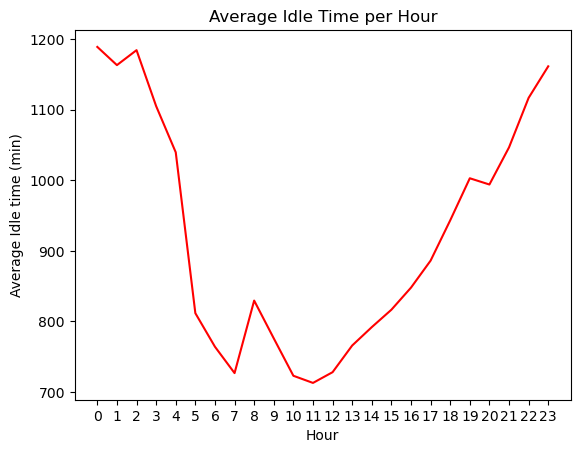

<Figure size 1600x900 with 0 Axes>

In [18]:
avg_perHour = df_merged.groupby(df_merged['start_time'].dt.hour)['idle_time_minutes'].mean()

plt.xlabel("Hour")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Hour")
plt.plot(avg_perHour.index,avg_perHour.values, color = "red") 
plt.xticks(range(0, 24, 1))
plt.figure(figsize = (16,9))
plt.show()

**Idle time and temperature**

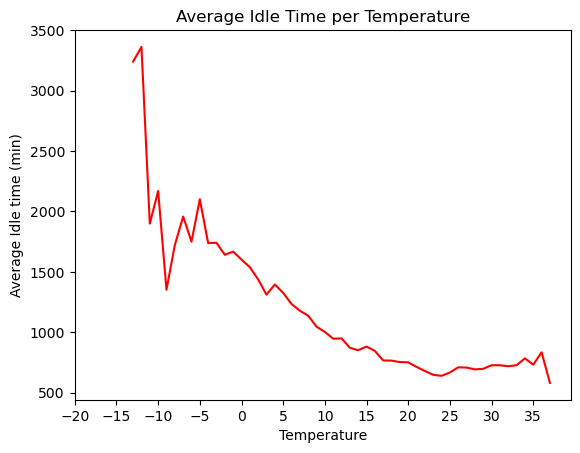

<Figure size 1600x900 with 0 Axes>

In [19]:
avg_perTemp = df_merged.groupby(df_merged['temperature'])['idle_time_minutes'].mean()

plt.xlabel("Temperature")
plt.ylabel("Average Idle time (min)")
plt.title("Average Idle Time per Temperature")
plt.plot(avg_perTemp.index,avg_perTemp.values, color = "red") 
plt.xticks(range(-20, 40, 5))
plt.figure(figsize = (16,9))
plt.show()

**Correlation between the features**


<Axes: >

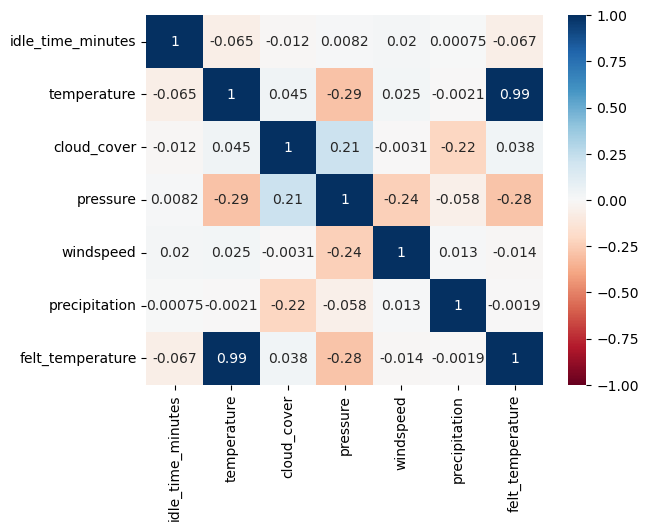

In [20]:
features = df_merged[['idle_time_minutes','temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation','felt_temperature']]
corr = features.corr()
# Create the heatmap
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [22]:
df_merged.drop('idle_time_minutes', axis=1, inplace=True)
df_merged.to_csv('merged_PhilWeather.csv', index=False)